# Marginal 1-dim posteriors from image data

- Using SWYFT core functions (i.e. look at swyft/core.py)
- Demonstrates `head` network

Author: Christoph Weniger and Benjamin Miller, August 2020

In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

torch.set_default_dtype(torch.float32)

In [2]:
DEVICE = 'cuda:0'
NDIM = 2 # number of parameters
NBINS = 1000
SIGMA = 0.01

In [3]:
# A toy model with a diffuse and point source component

def model(z, sigma = SIGMA, w = 0.4):
    x = z + np.random.randn(2)*sigma + (np.random.rand(2)-0.5)*w
    return x

In [4]:
z0 = np.array([0.5, 0.5])
x0 = model(z0)
print(x0)

[0.41381831 0.3846334 ]


In [5]:
# Instantiate network

sw = swyft.SWYFT(x0, model, zdim = 2, device = DEVICE, head = None)

In [6]:
sw.run(nrounds = 1, max_epochs = 5, nsamples = 30000)

Normalizations
x_mean tensor([0.5003, 0.4997])
x_err tensor([0.3115, 0.3114])
z_mean tensor([0.5003, 0.4998])
z_err tensor([0.2894, 0.2889])
Epoch: 0 []
Epoch: 1 [3.2175046615302563]
Epoch: 2 [3.2175046615302563, 3.180891666561365]
Epoch: 3 [3.2175046615302563, 3.180891666561365, 3.179971918463707]
Epoch: 4 [3.2175046615302563, 3.180891666561365, 3.179971918463707, 3.186405787244439]


/home/bmiller/swyft/swyft/core.py:227: UserWarning: Training finished by reaching max_epochs == 5.
  warn(f"Training finished by reaching max_epochs == {max_epochs}.")


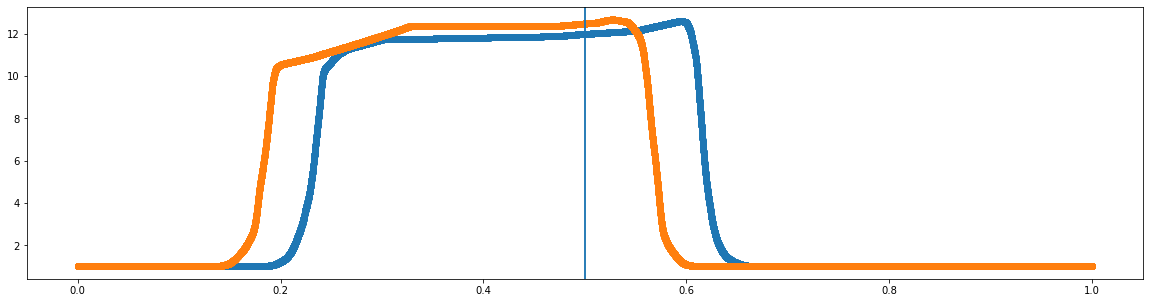

In [7]:
plt.figure(figsize=(20, 5))
for i in range(2):
    zgrid, lnLgrid = sw.posterior(i)
    plt.axvline(z0[i])
    plt.scatter(zgrid[:], np.exp(lnLgrid[:]))

In [8]:
sw.comb([[0, 1]], max_epochs = 5)

Normalizations
x_mean tensor([0.5003, 0.4997])
x_err tensor([0.3115, 0.3114])
z_mean tensor([0.5003, 0.4998])
z_err tensor([0.2894, 0.2889])
Epoch: 0 []
Epoch: 1 [0.9179839110001922]
Epoch: 2 [0.9179839110001922, 0.8720754405949265]
Epoch: 3 [0.9179839110001922, 0.8720754405949265, 0.8718856589403003]
Epoch: 4 [0.9179839110001922, 0.8720754405949265, 0.8718856589403003, 0.8952956413850188]


(0.0, 1.0)

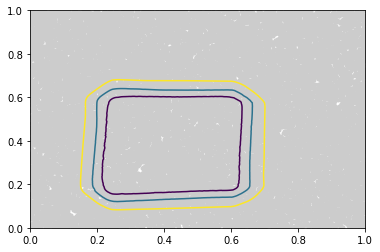

In [9]:
zgrid, lnLgrid = sw.posterior([0, 1])
plt.scatter(zgrid[:,0], zgrid[:,1], marker='.', color='0.8')
max_lnL = lnLgrid[:].max()
plt.tricontour(zgrid[:,0], zgrid[:,1], -lnLgrid+max_lnL, levels = [1, 4, 9])
plt.xlim([0, 1])
plt.ylim([0, 1])